# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for us to implement traffic sign classification in stages, which is required to successfully complete this project. Onto the template I have built a LeNet neural network mode and trained model over a german traffic signs database given whic can be found in http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset. The validation  is also selected inside the training database by splitting it into two subsamples. The test sample is also provide at the database separately. In addition, I have tested the performance of my network with completely new images that I have downloaded from internet. I tried to cover all the rubric points provided by Udacity Self-Driving Car Team [rubric points](https://review.udacity.com/#!/rubrics/481/view) which holds the minimum rquirements to pass the project.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = "./traffic-signs-data/train.p"
testing_file = "./traffic-signs-data/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (39209, 32, 32, 3)
y_train shape: (39209,)
X_test shape: (12630, 32, 32, 3)
y_test shape: (12630,)


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

The basic data summary is completed below. You can use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. I have used the based np.shape function to see the dimensions of the arrays.

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results
import numpy as np

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

To illustrate the figures, a random sample chosen from the German Traffic Signs Dataset using the pickled file(s). 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

17


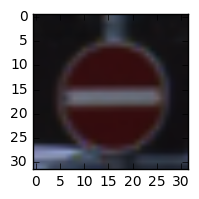

In [3]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

import random
index = random.randint(0, len(X_train))
image = X_train[index]

#select a random image from the training set and visualize it
plt.figure(figsize=(2,2))
plt.imshow(image)
print(y_train[index]) # label of the image

Here si the frequency distribution of the labels. The xlabel of the figure denotes the number allocated for each label. You can check the meaning of each number on the x-axis at `signnames.csv`.

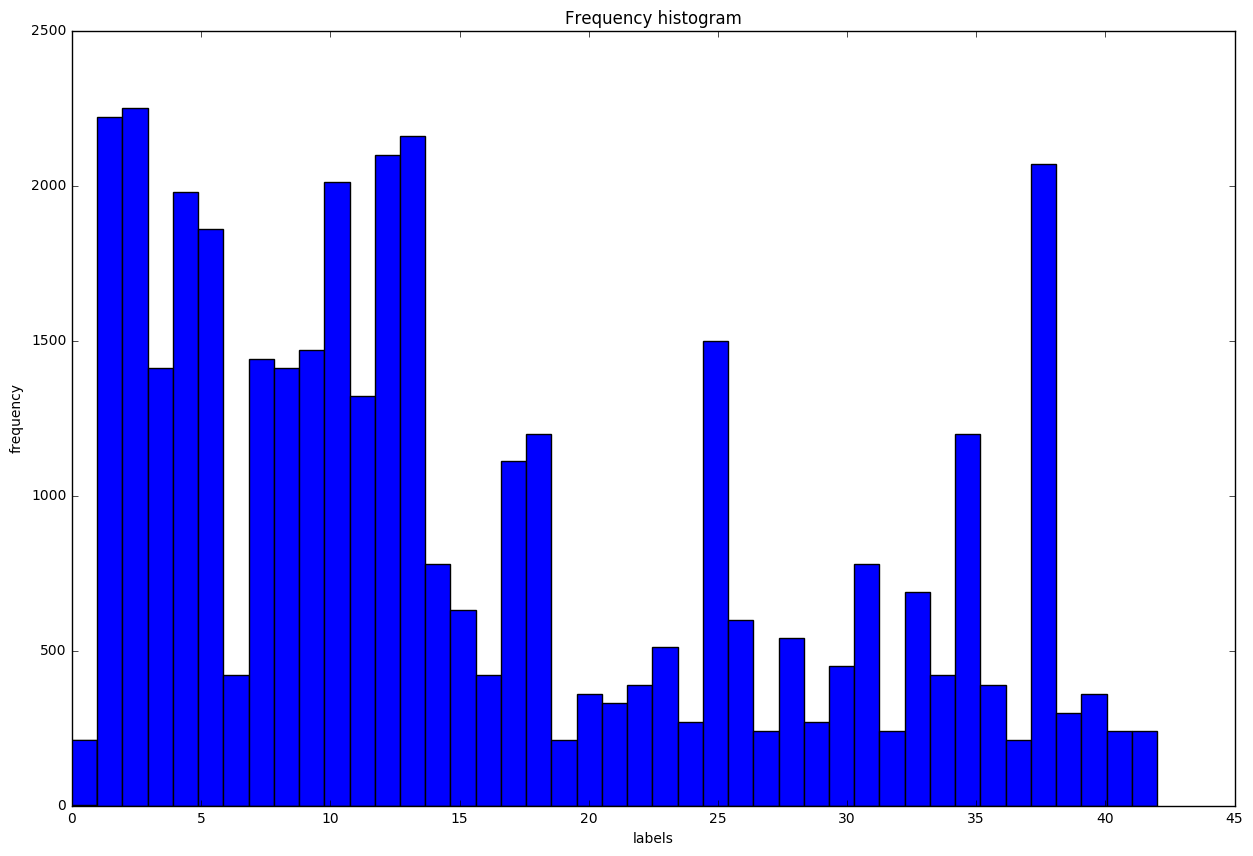

In [4]:
# histogram for labels
plt.figure(figsize=(15,10))
plt.hist(y_train, bins=n_classes, histtype='bar', align='mid', orientation='vertical')
plt.title("Frequency histogram")
plt.xlabel("labels")
plt.ylabel("frequency")
plt.show()


----

## Step 2: Design and Test a Model Architecture

The aim of this section is to design and implement a deep learning model that learns to recognize traffic signs. In this section I train and test the LeNet architecture neural network model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Pre-process the Data Set (normalization, grayscale, etc.)

As you can see the first step is to preprocess the data. First thing to do is grayscaling my data. The purpose of grayscaling is to decrease the 3d size in RGBscale and focus on the shape of the image, not color. Then, we made feature scaling, because the standard approach is to scale the inputs to have mean 0 and a variance of 1. 

X train (39209, 32, 32)
39209
X_train modified (39209, 32, 32, 1)
X_test modified (39209, 32, 32, 1)


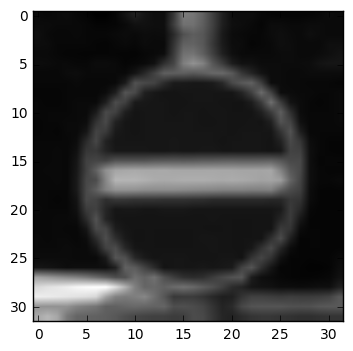

In [5]:
### Preprocess the data here. Preprocessing steps could include normalization, converting to grayscale, etc.
### Feel free to use as many code cells as needed.
# Grayscaling
import cv2  #bringing in OpenCV libraries
X_trainGray = np.zeros(shape = [X_train.shape[0],X_train.shape[1],X_train.shape[2]], dtype = np.int32)
for i in range(n_train):
    X_trainGray[i] = cv2.cvtColor(X_train[i], cv2.COLOR_RGB2GRAY)

X_testGray = np.zeros(shape = [X_test.shape[0],X_test.shape[1],X_test.shape[2]], dtype = np.int32)
for i in range(n_test):
    X_testGray[i] = cv2.cvtColor(X_test[i], cv2.COLOR_RGB2GRAY)
    
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
print("X train", X_trainGray.shape)
plt.imshow(gray, cmap='gray')

print(len(X_trainGray))
X_trainGray = np.expand_dims(X_trainGray, axis=3)
X_testGray = np.expand_dims(X_testGray, axis=3)
print("X_train modified", X_trainGray.shape)
print("X_test modified", X_trainGray.shape)

159 12
1.9140625 0.0625
-0.360153214587
-0.365019658588
Original shape: (39209, 32, 32, 3)
Normalized shape: (39209, 32, 32, 1)


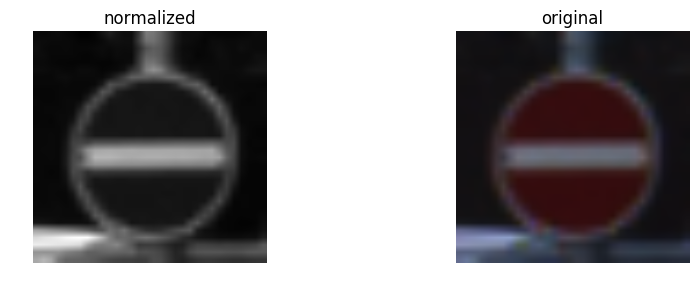

In [6]:
#Normalizing
print(np.amax(gray), np.amin(gray))
X_train_normalized = (X_trainGray - 128)/128 
X_test_normalized = (X_testGray - 128)/128
gray_norm = (gray - 128)/128
print(np.amax(gray_norm), np.amin(gray_norm))

print(np.mean(X_train_normalized))
print(np.mean(X_test_normalized))

print("Original shape:", X_train.shape)
print("Normalized shape:", X_train_normalized.shape)
fig, axs = plt.subplots(1,2, figsize=(10, 3))
axs = axs.ravel()

axs[0].axis('off')
axs[0].set_title('normalized')
axs[0].imshow(X_train_normalized[index].squeeze(), cmap='gray')

axs[1].axis('off')
axs[1].set_title('original')
axs[1].imshow(X_train[index].squeeze(), cmap='gray')

If you want a faster convergence with stochastic gradient descent method when training the data, you should shuffle your the input.

In [7]:
# Shuffle data
from sklearn.utils import shuffle
X_train_normalized, y_train = shuffle(X_train_normalized, y_train)

### Split Data into Training, Validation and Testing Sets

As mentioned in the introduction, we obtain the validation by splitting 20% of the training data into validation and training subsets.

In [8]:
### Split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.

# We set the 20% of the training set as the validation dataset
from sklearn.model_selection import train_test_split
X_train, X_validation, y_train, y_validation = train_test_split(X_train_normalized, y_train, 
                                                                test_size=0.20, random_state=42)

### Model Architecture

In [9]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
import tensorflow as tf

EPOCHS = 60
BATCH_SIZE = 128

# LeNet Lab
We have chosen the _LeNet Architecture_ as it is suitable for our image classification.
![LeNet Architecture](lenet.png)
Source: Yan LeCun

### Input
The LeNet architecture accepts a 32x32xC image as input, where C is the number of color channels. Since MNIST images are grayscale, C is 1 in this case.

### Architecture
**Layer 1: Convolutional.** The output shape should be 28x28x6.

**Activation.** Your choice of activation function.

**Pooling.** The output shape should be 14x14x6.

**Layer 2: Convolutional.** The output shape should be 10x10x16.

**Activation.** Your choice of activation function.

**Pooling.** The output shape should be 5x5x16.

**Flatten.** Flatten the output shape of the final pooling layer such that it's 1D instead of 3D. The easiest way to do is by using `tf.contrib.layers.flatten`, which is already imported for you.

**Layer 3: Fully Connected.** This should have 120 outputs.

**Activation.** Your choice of activation function.

**Layer 4: Fully Connected.** This should have 84 outputs.

**Activation.** Your choice of activation function.

**Layer 5: Fully Connected (Logits).** This should have 10 outputs.

### Output
Return the result of the 2nd fully connected layer.

In [10]:
from tensorflow.contrib.layers import flatten

def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0 # mean
    sigma = 0.1 # std deviation
    
    # TODO: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(32-28+1, 32-28+1, 1, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1 = tf.nn.conv2d(x, conv1_W, strides=[1,1,1,1], padding='VALID') + conv1_b
    print("layer 1 shape:",conv1.get_shape())
    
    # TODO: Activation.
    conv1 = tf.nn.relu(conv1)

    # TODO: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    # TODO: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(14-10+1, 14-10+1, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2 = tf.nn.conv2d(conv1, conv2_W, strides=[1,1,1,1], padding='VALID') + conv2_b
    print("layer 2 shape:",conv2.get_shape())
    
    # TODO: Activation.
    conv2 = tf.nn.relu(conv2)

    # TODO: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    # TODO: Flatten. Input = 5x5x16. Output = 400.
    conv2 = flatten(conv2)
    
    # TODO: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400,120), mean = mu, stddev=sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1 = tf.matmul(conv2, fc1_W)+fc1_b
    print("layer 3 shape:",fc1.get_shape())
    
    # TODO: Activation.
    fc1 = tf.nn.relu(fc1)
    
    # Additional: Dropout
    dp1 = tf.nn.dropout(fc1, dp_prob)
    
    # TODO: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W = tf.Variable(tf.truncated_normal(shape=(120,84), mean = mu, stddev=sigma))
    fc2_b = tf.Variable(tf.zeros(84))
    fc2 = tf.matmul(dp1, fc2_W)+fc2_b
    print("layer 4 shape:",fc2.get_shape())
    
    # TODO: Activation.
    fc2 = tf.nn.relu(fc2)
    
    # Additional: Dropout
    dp2 = tf.nn.dropout(fc2, dp_prob)
    
    # TODO: Layer 5: Fully Connected. Input = 84. Output = 43.
    logits_W = tf.Variable(tf.truncated_normal(shape=(84,43), mean = mu, stddev=sigma))
    logits_b = tf.Variable(tf.zeros(43))
    logits = tf.matmul(dp2, logits_W)+logits_b
    print("layer 5 shape:",logits.get_shape())
    
    return logits


## Features and Labels
Train LeNet to classify _Traffic Sign Dataset_.

First we need to reset the graph.
`x` is a placeholder for a batch of input images.
`y` is a placeholder for a batch of output labels.
Then one_hot encode the data for the ease of classification.
e.g.
0 -> [0,0,0,1]

1 -> [0,0,1,0]

2 -> [0,1,0,0]

3 -> [1,0,0,0]

...

In [11]:
tf.reset_default_graph() 
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
dp_prob = tf.placeholder(tf.float32)
with tf.device('/cpu:0'):
    one_hot_y = tf.one_hot(y, n_classes)

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the test set but low accuracy on the validation set implies overfitting.

## Training Pipeline
Create a training pipeline that uses the model to classify Road Signs data.

In [12]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.
rate = 0.001

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

layer 1 shape: (?, 28, 28, 6)
layer 2 shape: (?, 10, 10, 16)
layer 3 shape: (?, 120)
layer 4 shape: (?, 84)
layer 5 shape: (?, 43)


## Model Evaluation
Evaluate how well the loss and accuracy of the model for a given dataset.

In [13]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, dp_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

## Train the Model
Run the training data through the training pipeline to train the model.

Before each epoch, shuffle the training set.

After each epoch, measure the loss and accuracy of the validation set.

Save the model after training.

In [14]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, dp_prob: 0.5})
            
        validation_accuracy = evaluate(X_validation, y_validation)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './lenet')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.557

EPOCH 2 ...
Validation Accuracy = 0.784

EPOCH 3 ...
Validation Accuracy = 0.862

EPOCH 4 ...
Validation Accuracy = 0.904

EPOCH 5 ...
Validation Accuracy = 0.926

EPOCH 6 ...
Validation Accuracy = 0.942

EPOCH 7 ...
Validation Accuracy = 0.950

EPOCH 8 ...
Validation Accuracy = 0.958

EPOCH 9 ...
Validation Accuracy = 0.958

EPOCH 10 ...
Validation Accuracy = 0.961

EPOCH 11 ...
Validation Accuracy = 0.965

EPOCH 12 ...
Validation Accuracy = 0.966

EPOCH 13 ...
Validation Accuracy = 0.970

EPOCH 14 ...
Validation Accuracy = 0.976

EPOCH 15 ...
Validation Accuracy = 0.975

EPOCH 16 ...
Validation Accuracy = 0.974

EPOCH 17 ...
Validation Accuracy = 0.976

EPOCH 18 ...
Validation Accuracy = 0.977

EPOCH 19 ...
Validation Accuracy = 0.981

EPOCH 20 ...
Validation Accuracy = 0.982

EPOCH 21 ...
Validation Accuracy = 0.983

EPOCH 22 ...
Validation Accuracy = 0.983

EPOCH 23 ...
Validation Accuracy = 0.983

EPOCH 24 ...
Validation Accura

## Evaluate the Model
Once you are completely satisfied with your model, evaluate the performance of the model on the test set.
​
Be sure to only do this once!
​
If you were to measure the performance of your trained model on the test set, then improve your model, and then measure the performance of your model on the test set again, that would invalidate your test results. You wouldn't get a true measure of how well your model would perform against real data.
​

In [20]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_testGray, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.933


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### 1. Load and Output the Images

In [21]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import os,sys
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

size_images = 10
images = np.zeros((size_images,32,32,3))
for i in range(size_images):
    filename = "./external-traffic-signs/p%d_resized.jpg" % i
    images[i] = cv2.imread(filename)
    
print(images[0].shape)
images = images.astype('uint8')

text_file = open("./external-traffic-signs/extResults.txt","r")
ylabel = np.zeros(size_images)
ylabel = text_file.readlines()
print(ylabel[0])

# Grayscaling
imagesGray = np.zeros(shape = [images.shape[0],images.shape[1],images.shape[2]], dtype = np.uint8)
for i in range(size_images):
    imagesGray[i] = cv2.cvtColor(images[i], cv2.COLOR_RGB2GRAY)

imagesGray = np.expand_dims(imagesGray, axis=3)
print(imagesGray.shape)
imagesNormalized = (imagesGray - 128)/128 


(32, 32, 3)
41

(10, 32, 32, 1)


### 2. Predict the Sign Type for Each Image

In [22]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    # saver.restore(sess, tf.train.latest_checkpoint('.'))
    my_accuracy = evaluate(imagesNormalized, ylabel)
    

### 3. Analyze Performance

In [23]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.
print("Test Set Accuracy = {:.3f}".format(my_accuracy))

Test Set Accuracy = 0.000


### 4. Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

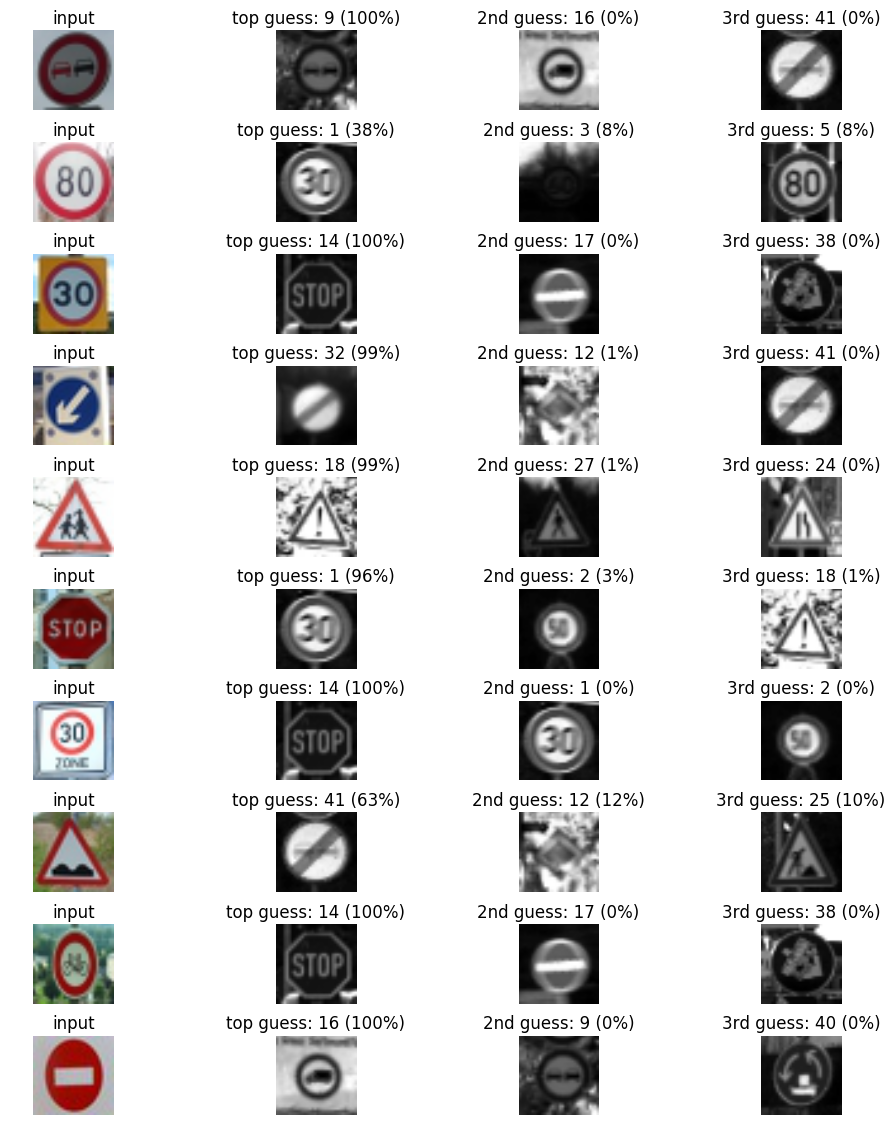

In [24]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.
softmax_logits = tf.nn.softmax(logits)
top_k = tf.nn.top_k(softmax_logits, k=3)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    newSoftmaxLogits = sess.run(softmax_logits, feed_dict={x: imagesNormalized, dp_prob: 1.0})
    newtop_k = sess.run(top_k, feed_dict={x: imagesNormalized, dp_prob: 1.0})

    fig, axs = plt.subplots(len(images),4, figsize=(12, 14))
    fig.subplots_adjust(hspace = .4, wspace=.2)
    axs = axs.ravel()

    for i, image in enumerate(images):
        axs[4*i].axis('off')
        axs[4*i].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        axs[4*i].set_title('input')
        guess1 = newtop_k[1][i][0]
        index1 = np.argwhere(y_validation == guess1)[0]
        axs[4*i+1].axis('off')
        axs[4*i+1].imshow(X_validation[index1].squeeze(), cmap='gray')
        axs[4*i+1].set_title('top guess: {} ({:.0f}%)'.format(guess1, 100*newtop_k[0][i][0]))
        guess2 = newtop_k[1][i][1]
        index2 = np.argwhere(y_validation == guess2)[0]
        axs[4*i+2].axis('off')
        axs[4*i+2].imshow(X_validation[index2].squeeze(), cmap='gray')
        axs[4*i+2].set_title('2nd guess: {} ({:.0f}%)'.format(guess2, 100*newtop_k[0][i][1]))
        guess3 = newtop_k[1][i][2]
        index3 = np.argwhere(y_validation == guess3)[0]
        axs[4*i+3].axis('off')
        axs[4*i+3].imshow(X_validation[index3].squeeze(), cmap='gray')
        axs[4*i+3].set_title('3rd guess: {} ({:.0f}%)'.format(guess3, 100*newtop_k[0][i][2]))